In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install plotly

^C
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 3.4 MB/s eta 0:00:06
   --- ------------------------------------ 1.6/19.1 MB 4.9 MB/s eta 0:00:04
   ----- ---------------------------------- 2.6/19.1 MB 5.0 MB/s eta 0:00:04
   -------- ------------------------------- 3.9/19.1 MB 5.5 MB/s eta 0:00:03
   ---------- ----------------------------- 5.0/19.1 MB 5.5 MB/s eta 0:00:03
   ------------- -------------------------- 6.3/19.1 MB 5.5 MB/s eta 0:00:03
   --------------- ------------------------ 7.3/19.1 MB 5.4 MB/s eta 0:00:03
   ----------------- ---------------------- 8.4/19.1 MB 5.3 MB/s eta 0:00:03
   -------------------- ------------------- 9.7/19.1 MB 5.3 MB/s eta 0:00:02
   ---------------------- ----------------- 10.7/19.1 MB 5.4 MB/s eta 0:00:02
   ------------------------ --------------- 11.8/19.1 MB 5.3 MB/s eta 0:00:02
   --------------------------- ------------ 13.1/19.1 MB 5.4 MB/s eta 0:00:02


In [12]:
!pip install openpyxl

In [8]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [13]:
train_data = pd.read_excel("D:/Train_new.xlsx")

In [14]:
missing_values = train_data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Holiday               37398
Temperature               0
Rainfall_last_hour        0
Snowfall_last_hour        0
Cloud_Cover               0
Weather                   0
Weather_Desc              0
TimeStamp                 0
Date                      0
Traffic_Vol               0
dtype: int64


In [15]:
# Convert timestamp and date columns to datetime format
train_data['TimeStamp'] = pd.to_datetime(train_data['TimeStamp'], format='%d/%m/%y %H:%M')
train_data['Date'] = pd.to_datetime(train_data['Date'], format='%d/%m/%y')

In [16]:
train_data['Holiday'] = train_data.groupby('Date')['Holiday'].transform(lambda x: 1 if x.max() == 1 else 0)

In [17]:
verification = train_data.groupby('Date')['Holiday'].nunique()
inconsistent_dates = verification[verification > 1]
if inconsistent_dates.empty:
    print("All dates have consistent holiday values.")
else:
    print("Inconsistent holiday values found for dates:\n", inconsistent_dates)

All dates have consistent holiday values.


In [18]:
train_data.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,2008-10-02 09:00:00,2008-10-02,5555
1,0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-10-02 10:00:00,2008-10-02,4525
2,0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-10-02 11:00:00,2008-10-02,4772
3,0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-10-02 12:00:00,2008-10-02,5031
4,0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-10-02 13:00:00,2008-10-02,4928


In [19]:
# Feature engineering: Extract hour, day, and month from TimeStamp
train_data['Hour'] = train_data['TimeStamp'].dt.hour
train_data['Day'] = train_data['TimeStamp'].dt.day
train_data['Month'] = train_data['TimeStamp'].dt.month
train_data['Year'] = train_data['TimeStamp'].dt.year
train_data['Day_of_Week'] = train_data['TimeStamp'].dt.dayofweek

train_data['hour_sin'] = np.sin(2 * np.pi * train_data['Hour'] / 24)
train_data['hour_cos'] = np.cos(2 * np.pi * train_data['Hour'] / 24)
train_data['day_sin'] = np.sin(2 * np.pi * train_data['Day_of_Week'] / 7)
train_data['day_cos'] = np.cos(2 * np.pi * train_data['Day_of_Week'] / 7)

In [20]:
label_encoder = LabelEncoder()
train_data['Weather'] = label_encoder.fit_transform(train_data['Weather'])
train_data['Weather_Desc'] = label_encoder.fit_transform(train_data['Weather_Desc'])

In [21]:
train_data=train_data.drop(columns=['TimeStamp','Date'])

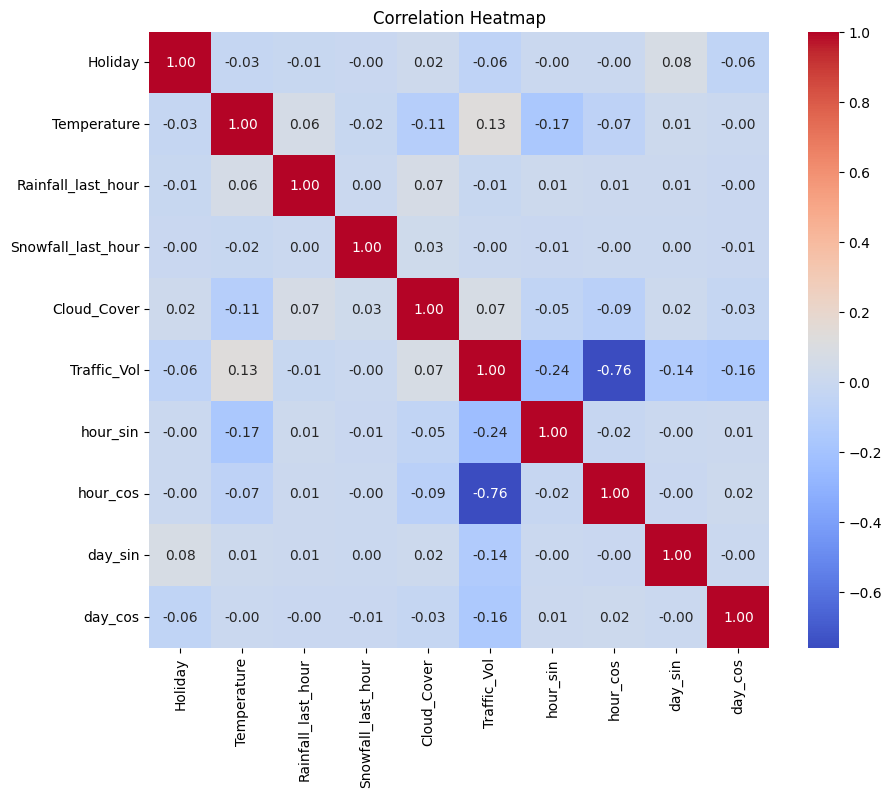

In [22]:
numerical_data=train_data.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10, 8))
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

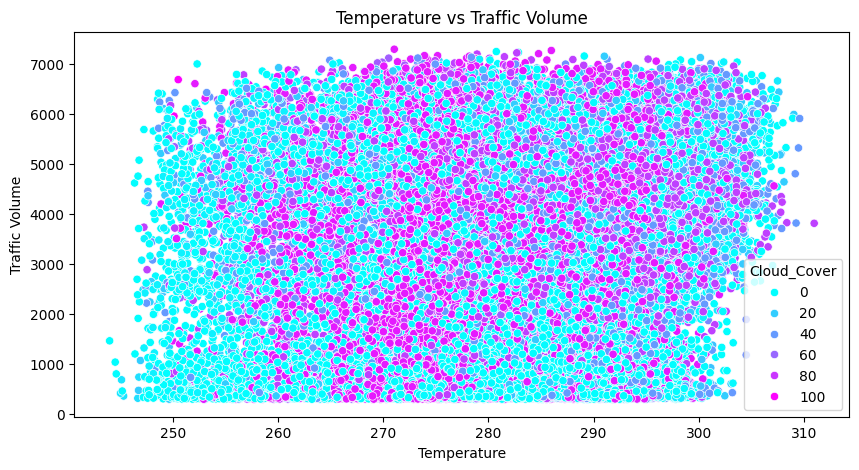

In [23]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train_data, x='Temperature', y='Traffic_Vol', hue='Cloud_Cover', palette='cool')
plt.title('Temperature vs Traffic Volume')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.show()

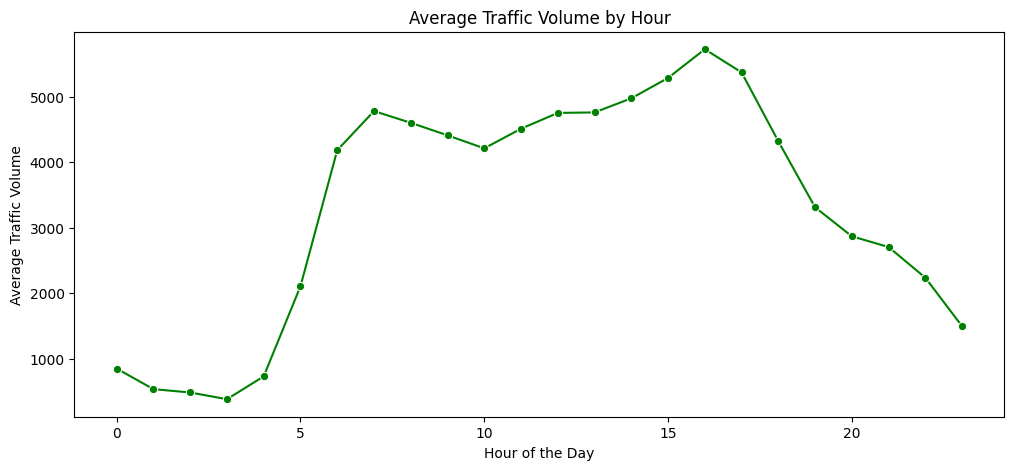

In [24]:
# Traffic Volume by Hour
hourly_data = train_data.groupby('Hour')['Traffic_Vol'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_data, x='Hour', y='Traffic_Vol', marker='o', color='green')
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.show()

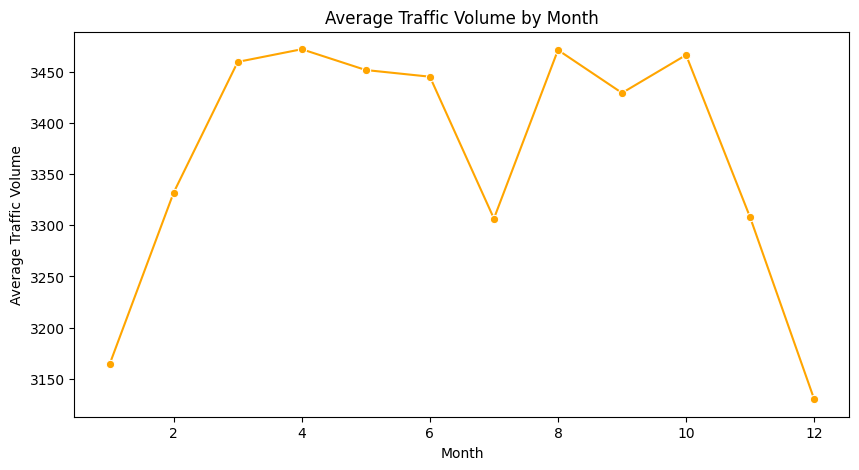

In [25]:
# Traffic Volume by Month
monthly_data = train_data.groupby('Month')['Traffic_Vol'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x='Month', y='Traffic_Vol', marker='o', color='orange')
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.show()

**Modelling Task**

In [27]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.8 MB 4.8 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 4.9 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.8 MB 5.1 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 5.3 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 5.5 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.8 MB 5.6 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 5.5 MB/s eta 0:00:00


In [28]:
# Import required libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.api import OLS, add_constant
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
y= train_data['Traffic_Vol']
X=train_data.drop(columns=['Traffic_Vol'])

In [30]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

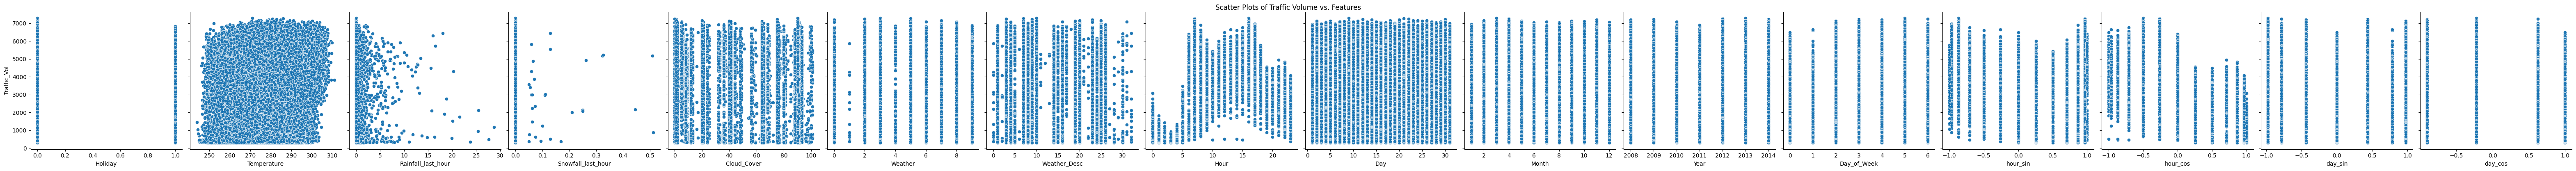

In [31]:
# Plot scatter plots to observe potential linear relationships
sns.pairplot(train_data, x_vars=X.columns, y_vars='Traffic_Vol', height=4, aspect=1, kind='scatter')
plt.suptitle("Scatter Plots of Traffic Volume vs. Features", y=1.02)
plt.show()

Modelling @ Serious

In [32]:
!pip install lightgbm xgboost scikit-learn optuna

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 6.1 MB/s eta 0:00:21
    --------------------------------------- 2.6/124.9 MB 6.3 MB/s eta 0:00:20
   - -------------------------------------- 3.7/124.9 MB 5.9 MB/s eta 0:00:21
   - -------------------------------------- 4.7/124.9 MB 5.6 MB/s eta 0:00:22
   - -------------------------------------- 5.8/124.9 MB 5.5 MB/s eta 0:00:22
   -- ------------------------------------- 7.1/124.9 MB 5.6 MB/s eta 0:00:22
   -- ------------------------------------- 7.9/124.9 MB 5.3 MB/s eta 0:00:22
   -- ------------------------------------- 8.9/124.9 MB 5.3 MB/s eta 0:00:22
   --- --------

In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.utils.validation import check_array
import optuna

In [34]:
# Helper function to evaluate models
def evaluate_model(model, X_val, y_val):
    predictions = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    return {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

In [35]:
# Hyperparameter tuning for LightGBM
def tune_lightgbm(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1500, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, step=0.005),
        'num_leaves': trial.suggest_int('num_leaves', 31, 300, step=10),
        'max_depth': trial.suggest_int('max_depth', 3, 20, step=1),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 150, step=5),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 1e1, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.05),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0, step=0.05),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0, step=0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0, step=0.1)
    }
    model = LGBMRegressor(**param, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    return rmse

In [36]:
print("Tuning LightGBM with advanced parameters...")
lightgbm_study = optuna.create_study(direction='minimize')
lightgbm_study.optimize(tune_lightgbm, n_trials=50)
print("Best LightGBM Parameters:", lightgbm_study.best_params)

[I 2025-01-26 15:26:42,235] A new study created in memory with name: no-name-c4995d31-c71b-4406-a94d-e52547f775a6


Tuning LightGBM with advanced parameters...


D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:26:49,118] Trial 0 finished with value: 287.22060321569444 and parameters: {'n_estimators': 1000, 'learning_rate': 0.14500000000000002, 'num_leaves': 261, 'max_depth': 18, 'min_child_samples': 140, 'min_child_weight': 0.13221384685482995, 'subsample': 1.0, 'colsample_bytree': 0.4, 'reg_alpha': 3.5, 'reg_lambda': 9.1}. Best is trial 0 with value: 287.22060321569444.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:26:51,742] Trial 1 finished with value: 301.1350334409871 and parameters: {'n_estimators': 300, 'learning_rate': 0.045, 'num_leaves': 181, 'max_depth': 15, 'min_child_samples': 85, 'min_child_weight': 0.09528604967831057, 'subsample': 0.8, 'colsample_bytree': 0.55, 'reg_alpha': 4.800000000000001, 'reg_lambda': 4.4}. Best is trial 0 with value: 287.22060321569444.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:26:54,240] Trial 2 finished with value: 286.3744275449271 and parameters: {'n_estimators': 800, 'learning_rate': 0.18000000000000002, 'num_leaves': 221, 'max_depth': 6, 'min_child_samples': 70, 'min_child_weight': 0.018697465626155353, 'subsample': 0.65, 'colsample_bytree': 0.8500000000000001, 'reg_alpha': 2.8000000000000003, 'reg_lambda': 2.5}. Best is trial 2 with value: 286.3744275449271.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777


[I 2025-01-26 15:26:57,722] Trial 3 finished with value: 273.2108792415312 and parameters: {'n_estimators': 1300, 'learning_rate': 0.17, 'num_leaves': 41, 'max_depth': 20, 'min_child_samples': 55, 'min_child_weight': 0.49694288681526305, 'subsample': 0.65, 'colsample_bytree': 0.9500000000000001, 'reg_alpha': 6.0, 'reg_lambda': 4.0}. Best is trial 3 with value: 273.2108792415312.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:26:59,490] Trial 4 finished with value: 323.8649632663938 and parameters: {'n_estimators': 500, 'learning_rate': 0.045, 'num_leaves': 281, 'max_depth': 7, 'min_child_samples': 150, 'min_child_weight': 0.003809775409728858, 'subsample': 0.4, 'colsample_bytree': 0.5, 'reg_alpha': 2.8000000000000003, 'reg_lambda': 3.8000000000000003}. Best is trial 3 with value: 273.2108792415312.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:27:06,749] Trial 5 finished with value: 285.96948477289516 and parameters: {'n_estimators': 1400, 'learning_rate': 0.025, 'num_leaves': 81, 'max_depth': 16, 'min_child_samples': 110, 'min_child_weight': 0.7238401135796717, 'subsample': 0.8, 'colsample_bytree': 0.65, 'reg_alpha': 9.200000000000001, 'reg_lambda': 6.4}. Best is trial 3 with value: 273.2108792415312.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:27:12,734] Trial 6 finished with value: 277.19722835930486 and parameters: {'n_estimators': 1300, 'learning_rate': 0.085, 'num_leaves': 251, 'max_depth': 10, 'min_child_samples': 70, 'min_child_weight': 1.307460500561047, 'subsample': 0.75, 'colsample_bytree': 0.5, 'reg_alpha': 2.9000000000000004, 'reg_lambda': 6.0}. Best is trial 3 with value: 273.2108792415312.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777


[I 2025-01-26 15:27:16,196] Trial 7 finished with value: 306.0138897201892 and parameters: {'n_estimators': 800, 'learning_rate': 0.015, 'num_leaves': 41, 'max_depth': 12, 'min_child_samples': 15, 'min_child_weight': 0.0047385242154235115, 'subsample': 0.9500000000000001, 'colsample_bytree': 1.0, 'reg_alpha': 8.5, 'reg_lambda': 6.4}. Best is trial 3 with value: 273.2108792415312.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:27:18,017] Trial 8 finished with value: 340.853096311948 and parameters: {'n_estimators': 600, 'learning_rate': 0.030000000000000002, 'num_leaves': 211, 'max_depth': 5, 'min_child_samples': 115, 'min_child_weight': 0.14267612342311647, 'subsample': 0.9, 'colsample_bytree': 1.0, 'reg_alpha': 8.5, 'reg_lambda': 8.200000000000001}. Best is trial 3 with value: 273.2108792415312.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:27:18,947] Trial 9 finished with value: 530.1506381130645 and parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'num_leaves': 211, 'max_depth': 7, 'min_child_samples': 75, 'min_child_weight': 0.006839834292815256, 'subsample': 0.75, 'colsample_bytree': 0.6000000000000001, 'reg_alpha': 6.4, 'reg_lambda': 1.4000000000000001}. Best is trial 3 with value: 273.2108792415312.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:27:25,187] Trial 10 finished with value: 270.4896804200381 and parameters: {'n_estimators': 1100, 'learning_rate': 0.2, 'num_leaves': 121, 'max_depth': 20, 'min_child_samples': 20, 'min_child_weight': 8.71322224573305, 'subsample': 0.55, 'colsample_bytree': 0.8, 'reg_alpha': 0.7000000000000001, 'reg_lambda': 0.1}. Best is trial 10 with value: 270.4896804200381.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:27:30,762] Trial 11 finished with value: 270.41023205521947 and parameters: {'n_estimators': 1100, 'learning_rate': 0.19, 'num_leaves': 111, 'max_depth': 18, 'min_child_samples': 20, 'min_child_weight': 7.704179863086938, 'subsample': 0.55, 'colsample_bytree': 0.8, 'reg_alpha': 0.4, 'reg_lambda': 0.2}. Best is trial 11 with value: 270.41023205521947.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-01-26 15:27:36,509] Trial 12 finished with value: 266.5854080395028 and parameters: {'n_estimators': 1100, 'learning_rate': 0.2, 'num_leaves': 121, 'max_depth': 20, 'min_child_samples': 5, 'min_child_weight': 7.339246034436388, 'subsample': 0.5, 'colsample_bytree': 0.8, 'reg_alpha': 0.1, 'reg_lambda': 0.2}. Best is trial 12 with value: 266.5854080395028.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:27:42,715] Trial 13 finished with value: 270.166619425993 and parameters: {'n_estimators': 1100, 'learning_rate': 0.135, 'num_leaves': 131, 'max_depth': 15, 'min_child_samples': 35, 'min_child_weight': 9.226924894670576, 'subsample': 0.5, 'colsample_bytree': 0.75, 'reg_alpha': 0.30000000000000004, 'reg_lambda': 0.1}. Best is trial 12 with value: 266.5854080395028.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:27:49,078] Trial 14 finished with value: 271.1351397832009 and parameters: {'n_estimators': 1000, 'learning_rate': 0.13, 'num_leaves': 151, 'max_depth': 14, 'min_child_samples': 45, 'min_child_weight': 2.6898558785625695, 'subsample': 0.4, 'colsample_bytree': 0.7000000000000001, 'reg_alpha': 1.4000000000000001, 'reg_lambda': 2.1}. Best is trial 12 with value: 266.5854080395028.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:27:58,689] Trial 15 finished with value: 260.85590696025446 and parameters: {'n_estimators': 1500, 'learning_rate': 0.09000000000000001, 'num_leaves': 151, 'max_depth': 11, 'min_child_samples': 5, 'min_child_weight': 3.143848766304025, 'subsample': 0.5, 'colsample_bytree': 0.75, 'reg_alpha': 0.1, 'reg_lambda': 1.1}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:28:04,608] Trial 16 finished with value: 267.9583233336473 and parameters: {'n_estimators': 1400, 'learning_rate': 0.095, 'num_leaves': 71, 'max_depth': 10, 'min_child_samples': 35, 'min_child_weight': 2.0616310792794605, 'subsample': 0.5, 'colsample_bytree': 0.9, 'reg_alpha': 1.5, 'reg_lambda': 1.6}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:28:15,011] Trial 17 finished with value: 261.96639243226804 and parameters: {'n_estimators': 1500, 'learning_rate': 0.08, 'num_leaves': 161, 'max_depth': 12, 'min_child_samples': 5, 'min_child_weight': 0.3150292154361033, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.7000000000000001, 'reg_alpha': 4.1000000000000005, 'reg_lambda': 3.0}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:28:17,667] Trial 18 finished with value: 345.407812469056 and parameters: {'n_estimators': 1500, 'learning_rate': 0.07, 'num_leaves': 171, 'max_depth': 3, 'min_child_samples': 5, 'min_child_weight': 0.043948773921411645, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.7000000000000001, 'reg_alpha': 6.9, 'reg_lambda': 3.1}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:28:28,109] Trial 19 finished with value: 271.2579329306503 and parameters: {'n_estimators': 1500, 'learning_rate': 0.115, 'num_leaves': 191, 'max_depth': 12, 'min_child_samples': 35, 'min_child_weight': 0.3693590458470065, 'subsample': 0.45, 'colsample_bytree': 0.65, 'reg_alpha': 5.0, 'reg_lambda': 5.2}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:28:33,519] Trial 20 finished with value: 281.0331848324602 and parameters: {'n_estimators': 1300, 'learning_rate': 0.07, 'num_leaves': 91, 'max_depth': 9, 'min_child_samples': 95, 'min_child_weight': 0.2867192182116946, 'subsample': 0.65, 'colsample_bytree': 0.9, 'reg_alpha': 4.3, 'reg_lambda': 1.3}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:28:42,283] Trial 21 finished with value: 264.62402249392517 and parameters: {'n_estimators': 1500, 'learning_rate': 0.16, 'num_leaves': 151, 'max_depth': 13, 'min_child_samples': 5, 'min_child_weight': 3.5773777507042026, 'subsample': 0.55, 'colsample_bytree': 0.75, 'reg_alpha': 1.6, 'reg_lambda': 0.9}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:28:51,409] Trial 22 finished with value: 261.59573466211555 and parameters: {'n_estimators': 1500, 'learning_rate': 0.115, 'num_leaves': 151, 'max_depth': 13, 'min_child_samples': 5, 'min_child_weight': 3.1299791084918263, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.75, 'reg_alpha': 1.7000000000000002, 'reg_lambda': 2.9000000000000004}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:28:59,266] Trial 23 finished with value: 269.99276575564903 and parameters: {'n_estimators': 1300, 'learning_rate': 0.11, 'num_leaves': 141, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.8975046185506479, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.65, 'reg_alpha': 1.7000000000000002, 'reg_lambda': 3.1}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:29:08,897] Trial 24 finished with value: 269.62071467006126 and parameters: {'n_estimators': 1400, 'learning_rate': 0.08, 'num_leaves': 171, 'max_depth': 13, 'min_child_samples': 55, 'min_child_weight': 3.3646952317630334, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.75, 'reg_alpha': 3.7, 'reg_lambda': 3.5}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:29:14,525] Trial 25 finished with value: 272.30287404225356 and parameters: {'n_estimators': 1200, 'learning_rate': 0.055, 'num_leaves': 101, 'max_depth': 9, 'min_child_samples': 30, 'min_child_weight': 1.3519718550935316, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.8500000000000001, 'reg_alpha': 2.2, 'reg_lambda': 2.5}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:29:23,046] Trial 26 finished with value: 272.0932771761856 and parameters: {'n_estimators': 1400, 'learning_rate': 0.1, 'num_leaves': 191, 'max_depth': 11, 'min_child_samples': 50, 'min_child_weight': 0.0012247718793291847, 'subsample': 0.45, 'colsample_bytree': 0.6000000000000001, 'reg_alpha': 5.6000000000000005, 'reg_lambda': 5.2}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:29:37,036] Trial 27 finished with value: 266.55798203794836 and parameters: {'n_estimators': 1500, 'learning_rate': 0.115, 'num_leaves': 231, 'max_depth': 17, 'min_child_samples': 15, 'min_child_weight': 0.23233059875153173, 'subsample': 0.45, 'colsample_bytree': 0.7000000000000001, 'reg_alpha': 1.1, 'reg_lambda': 2.3000000000000003}. Best is trial 15 with value: 260.85590696025446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:29:45,442] Trial 28 finished with value: 260.1470338328608 and parameters: {'n_estimators': 1200, 'learning_rate': 0.13, 'num_leaves': 161, 'max_depth': 14, 'min_child_samples': 5, 'min_child_weight': 0.06084589428424904, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.8500000000000001, 'reg_alpha': 3.8000000000000003, 'reg_lambda': 4.6000000000000005}. Best is trial 28 with value: 260.1470338328608.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:29:53,592] Trial 29 finished with value: 275.06505455408535 and parameters: {'n_estimators': 1300, 'learning_rate': 0.14, 'num_leaves': 141, 'max_depth': 14, 'min_child_samples': 125, 'min_child_weight': 0.06260477598098227, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.8500000000000001, 'reg_alpha': 2.3000000000000003, 'reg_lambda': 9.8}. Best is trial 28 with value: 260.1470338328608.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:30:00,485] Trial 30 finished with value: 293.1377332019554 and parameters: {'n_estimators': 900, 'learning_rate': 0.155, 'num_leaves': 191, 'max_depth': 16, 'min_child_samples': 25, 'min_child_weight': 0.02336752268752205, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.4, 'reg_alpha': 3.5, 'reg_lambda': 4.2}. Best is trial 28 with value: 260.1470338328608.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:30:08,748] Trial 31 finished with value: 259.9507003160446 and parameters: {'n_estimators': 1200, 'learning_rate': 0.125, 'num_leaves': 171, 'max_depth': 13, 'min_child_samples': 5, 'min_child_weight': 0.121271938645855, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.75, 'reg_alpha': 4.3, 'reg_lambda': 4.800000000000001}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:30:17,972] Trial 32 finished with value: 263.7608625778198 and parameters: {'n_estimators': 1200, 'learning_rate': 0.125, 'num_leaves': 171, 'max_depth': 14, 'min_child_samples': 10, 'min_child_weight': 0.15310201121438466, 'subsample': 0.75, 'colsample_bytree': 0.8, 'reg_alpha': 4.2, 'reg_lambda': 4.6000000000000005}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:30:24,516] Trial 33 finished with value: 270.7335659667042 and parameters: {'n_estimators': 900, 'learning_rate': 0.155, 'num_leaves': 151, 'max_depth': 13, 'min_child_samples': 40, 'min_child_weight': 0.024813534183840517, 'subsample': 0.65, 'colsample_bytree': 0.9, 'reg_alpha': 3.3000000000000003, 'reg_lambda': 7.7}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:30:33,699] Trial 34 finished with value: 270.96315727467163 and parameters: {'n_estimators': 1200, 'learning_rate': 0.125, 'num_leaves': 181, 'max_depth': 11, 'min_child_samples': 25, 'min_child_weight': 0.09441330759866406, 'subsample': 0.55, 'colsample_bytree': 0.75, 'reg_alpha': 2.1, 'reg_lambda': 5.6000000000000005}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:30:42,594] Trial 35 finished with value: 266.4564618748477 and parameters: {'n_estimators': 1000, 'learning_rate': 0.14500000000000002, 'num_leaves': 211, 'max_depth': 15, 'min_child_samples': 15, 'min_child_weight': 0.010558239307052368, 'subsample': 0.65, 'colsample_bytree': 0.8500000000000001, 'reg_alpha': 5.4, 'reg_lambda': 4.7}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:30:46,175] Trial 36 finished with value: 271.9086116027409 and parameters: {'n_estimators': 500, 'learning_rate': 0.095, 'num_leaves': 131, 'max_depth': 16, 'min_child_samples': 60, 'min_child_weight': 0.04492155866030672, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.9500000000000001, 'reg_alpha': 6.800000000000001, 'reg_lambda': 3.7}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:30:49,521] Trial 37 finished with value: 285.05604464246466 and parameters: {'n_estimators': 700, 'learning_rate': 0.11, 'num_leaves': 241, 'max_depth': 8, 'min_child_samples': 90, 'min_child_weight': 0.6482647162579676, 'subsample': 0.65, 'colsample_bytree': 0.75, 'reg_alpha': 0.8, 'reg_lambda': 7.0}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:30:53,931] Trial 38 finished with value: 262.62505319816955 and parameters: {'n_estimators': 1400, 'learning_rate': 0.17, 'num_leaves': 61, 'max_depth': 11, 'min_child_samples': 10, 'min_child_weight': 0.0019008538784077104, 'subsample': 0.8, 'colsample_bytree': 0.6000000000000001, 'reg_alpha': 2.7, 'reg_lambda': 4.3}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:31:06,251] Trial 39 finished with value: 271.55687360380847 and parameters: {'n_estimators': 1200, 'learning_rate': 0.12000000000000001, 'num_leaves': 291, 'max_depth': 13, 'min_child_samples': 25, 'min_child_weight': 4.61009343309416, 'subsample': 1.0, 'colsample_bytree': 0.8500000000000001, 'reg_alpha': 4.800000000000001, 'reg_lambda': 5.800000000000001}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:31:15,919] Trial 40 finished with value: 272.38514823604663 and parameters: {'n_estimators': 1300, 'learning_rate': 0.09000000000000001, 'num_leaves': 161, 'max_depth': 18, 'min_child_samples': 65, 'min_child_weight': 1.6437186818031913, 'subsample': 0.5, 'colsample_bytree': 0.8, 'reg_alpha': 3.1, 'reg_lambda': 0.8}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:31:26,174] Trial 41 finished with value: 261.96639243226804 and parameters: {'n_estimators': 1500, 'learning_rate': 0.08, 'num_leaves': 161, 'max_depth': 12, 'min_child_samples': 5, 'min_child_weight': 0.09521830241332283, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.7000000000000001, 'reg_alpha': 4.1000000000000005, 'reg_lambda': 3.0}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:31:37,261] Trial 42 finished with value: 265.2510558072976 and parameters: {'n_estimators': 1400, 'learning_rate': 0.10500000000000001, 'num_leaves': 201, 'max_depth': 15, 'min_child_samples': 10, 'min_child_weight': 0.493052546579816, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.65, 'reg_alpha': 3.9000000000000004, 'reg_lambda': 3.6}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:31:49,152] Trial 43 finished with value: 265.1098466968047 and parameters: {'n_estimators': 1500, 'learning_rate': 0.065, 'num_leaves': 181, 'max_depth': 12, 'min_child_samples': 15, 'min_child_weight': 0.19504088783684234, 'subsample': 0.55, 'colsample_bytree': 0.75, 'reg_alpha': 4.5, 'reg_lambda': 1.9000000000000001}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:31:56,089] Trial 44 finished with value: 264.296916729728 and parameters: {'n_estimators': 1400, 'learning_rate': 0.045, 'num_leaves': 111, 'max_depth': 11, 'min_child_samples': 5, 'min_child_weight': 0.07141916089650056, 'subsample': 0.75, 'colsample_bytree': 0.55, 'reg_alpha': 5.2, 'reg_lambda': 2.9000000000000004}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:32:03,928] Trial 45 finished with value: 276.05014022487177 and parameters: {'n_estimators': 1300, 'learning_rate': 0.085, 'num_leaves': 141, 'max_depth': 14, 'min_child_samples': 150, 'min_child_weight': 0.013811184122140815, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.8, 'reg_alpha': 6.0, 'reg_lambda': 4.9}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:32:07,944] Trial 46 finished with value: 269.5726545257352 and parameters: {'n_estimators': 700, 'learning_rate': 0.135, 'num_leaves': 131, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 1.0204625585719782, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.7000000000000001, 'reg_alpha': 0.0, 'reg_lambda': 2.5}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-26 15:32:16,880] Trial 47 finished with value: 267.4496177121284 and parameters: {'n_estimators': 1200, 'learning_rate': 0.10500000000000001, 'num_leaves': 171, 'max_depth': 13, 'min_child_samples': 30, 'min_child_weight': 0.036343240462042944, 'subsample': 0.65, 'colsample_bytree': 0.65, 'reg_alpha': 9.9, 'reg_lambda': 6.5}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-01-26 15:32:19,074] Trial 48 finished with value: 271.9767187788409 and parameters: {'n_estimators': 300, 'learning_rate': 0.055, 'num_leaves': 121, 'max_depth': 17, 'min_child_samples': 10, 'min_child_weight': 5.911089853894112, 'subsample': 0.5, 'colsample_bytree': 0.8, 'reg_alpha': 2.6, 'reg_lambda': 1.8}. Best is trial 31 with value: 259.9507003160446.
D:\python\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [31, 300] and step=10, but the range is not divisible by `step`. It will be replaced by [31, 291].
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 15
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-26 15:32:24,704] Trial 49 finished with value: 275.3701758172996 and parameters: {'n_estimators': 1000, 'learning_rate': 0.15, 'num_leaves': 271, 'max_depth': 9, 'min_child_samples': 45, 'min_child_weight': 0.39757238029634573, 'subsample': 0.55, 'colsample_bytree': 0.9500000000000001, 'reg_alpha': 7.800000000000001, 'reg_lambda': 0.8}. Best is trial 31 with value: 259.9507003160446.


Best LightGBM Parameters: {'n_estimators': 1200, 'learning_rate': 0.125, 'num_leaves': 171, 'max_depth': 13, 'min_child_samples': 5, 'min_child_weight': 0.121271938645855, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.75, 'reg_alpha': 4.3, 'reg_lambda': 4.800000000000001}


In [37]:
# Train final LightGBM model with best parameters
lightgbm_best_params = lightgbm_study.best_params
lightgbm_model = LGBMRegressor(**lightgbm_best_params, random_state=42)
lightgbm_model.fit(X_train, y_train)
lightgbm_results = evaluate_model(lightgbm_model, X_val, y_val)
print("\nLightGBM Performance (Advanced Tuning):", lightgbm_results)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [38]:
# Hyperparameter tuning for XGBoost
def tune_xgboost(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1500, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, step=0.005),
        'max_depth': trial.suggest_int('max_depth', 3, 20, step=1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10, step=1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.05),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0, step=0.05),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0, step=0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0, step=0.1)
    }
    model = XGBRegressor(**param, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    return rmse

In [39]:
print("Tuning XGBoost with advanced parameters...")
xgboost_study = optuna.create_study(direction='minimize')
xgboost_study.optimize(tune_xgboost, n_trials=50)
print("Best XGBoost Parameters:", xgboost_study.best_params)

[I 2025-01-26 15:32:34,046] A new study created in memory with name: no-name-ad887539-847a-4be9-9daf-6fd2a2031666


Tuning XGBoost with advanced parameters...


[I 2025-01-26 15:32:44,667] Trial 0 finished with value: 274.4768138741097 and parameters: {'n_estimators': 1300, 'learning_rate': 0.13, 'max_depth': 7, 'min_child_weight': 6, 'subsample': 0.75, 'colsample_bytree': 0.75, 'reg_alpha': 7.300000000000001, 'reg_lambda': 0.7000000000000001}. Best is trial 0 with value: 274.4768138741097.
[I 2025-01-26 15:33:05,384] Trial 1 finished with value: 282.15312050507714 and parameters: {'n_estimators': 1200, 'learning_rate': 0.135, 'max_depth': 12, 'min_child_weight': 3, 'subsample': 0.4, 'colsample_bytree': 0.7000000000000001, 'reg_alpha': 7.6000000000000005, 'reg_lambda': 5.800000000000001}. Best is trial 0 with value: 274.4768138741097.
[I 2025-01-26 15:33:17,181] Trial 2 finished with value: 271.49976992237106 and parameters: {'n_estimators': 1100, 'learning_rate': 0.14500000000000002, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.9, 'colsample_bytree': 1.0, 'reg_alpha': 0.8, 'reg_lambda': 7.2}. Best is trial 2 with value: 271.49976992

Best XGBoost Parameters: {'n_estimators': 800, 'learning_rate': 0.06, 'max_depth': 18, 'min_child_weight': 8, 'subsample': 0.65, 'colsample_bytree': 0.8500000000000001, 'reg_alpha': 6.5, 'reg_lambda': 8.6}


In [40]:
# Train final XGBoost model with best parameters
xgboost_best_params = xgboost_study.best_params
xgboost_model = XGBRegressor(**xgboost_best_params, random_state=42)
xgboost_model.fit(X_train, y_train)
xgboost_results = evaluate_model(xgboost_model, X_val, y_val)
print("\nXGBoost Performance (Advanced Tuning):", xgboost_results)


XGBoost Performance (Advanced Tuning): {'RMSE': 265.6881102761066, 'MAE': 165.5320202656929, 'R2': 0.9814637303352356}


In [41]:
# Blending Ensemble (Alternative to Stacking)
def blending_ensemble(models, X_val):
    predictions = [model.predict(X_val) for model in models]
    return np.mean(predictions, axis=0)

In [42]:
# Train the blending ensemble
print("\nBuilding Hybrid Model with Blending...")
models = [
    LGBMRegressor(**lightgbm_best_params, random_state=42).fit(X_train, y_train),
    XGBRegressor(**xgboost_best_params, random_state=42).fit(X_train, y_train)
]

blending_predictions = blending_ensemble(models, X_val)
blending_rmse = np.sqrt(mean_squared_error(y_val, blending_predictions))
print("\nBlending Model RMSE:", blending_rmse)


Building Hybrid Model with Blending...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 28086, number of used features: 16
[LightGBM] [Info] Start training from score 3357.944777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

Prediction Goes Here

In [43]:
test_data = pd.read_csv("D:/machine hack/Dataset/Test.csv")

In [44]:
missing_values = test_data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Holiday               2205
Temperature              0
Rainfall_last_hour       0
Snowfall_last_hour       0
Cloud_Cover              0
Weather                  0
Weather_Desc             0
TimeStamp                0
Date                     0
Traffic_Vol           2208
dtype: int64


In [45]:
test_data.columns

Index(['Holiday', 'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour',
       'Cloud_Cover', 'Weather', 'Weather_Desc', 'TimeStamp', 'Date',
       'Traffic_Vol'],
      dtype='object')

In [46]:
train_data.columns

Index(['Holiday', 'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour',
       'Cloud_Cover', 'Weather', 'Weather_Desc', 'Traffic_Vol', 'Hour', 'Day',
       'Month', 'Year', 'Day_of_Week', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos'],
      dtype='object')

In [47]:
# Convert timestamp and date columns to datetime format
test_data['TimeStamp'] = pd.to_datetime(test_data['TimeStamp'], format='%d/%m/%y %H:%M')
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%d/%m/%y')

In [48]:
test_data['Holiday'] = test_data.groupby('Date')['Holiday'].transform(lambda x: 1 if x.max() == 1 else 0)

In [49]:
verification = test_data.groupby('Date')['Holiday'].nunique()
inconsistent_dates = verification[verification > 1]
if inconsistent_dates.empty:
    print("All dates have consistent holiday values.")
else:
    print("Inconsistent holiday values found for dates:\n", inconsistent_dates)

All dates have consistent holiday values.


In [50]:
# Feature engineering: Extract hour, day, and month from TimeStamp
test_data['Hour'] = test_data['TimeStamp'].dt.hour
test_data['Day'] = test_data['TimeStamp'].dt.day
test_data['Month'] = test_data['TimeStamp'].dt.month
test_data['Year'] = test_data['TimeStamp'].dt.year
test_data['Day_of_Week'] = test_data['TimeStamp'].dt.dayofweek

test_data['hour_sin'] = np.sin(2 * np.pi * test_data['Hour'] / 24)
test_data['hour_cos'] = np.cos(2 * np.pi * test_data['Hour'] / 24)
test_data['day_sin'] = np.sin(2 * np.pi * test_data['Day_of_Week'] / 7)
test_data['day_cos'] = np.cos(2 * np.pi * test_data['Day_of_Week'] / 7)

In [51]:
test_data=test_data.drop(columns=['TimeStamp','Date'])

In [52]:
missing_values = test_data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Holiday                  0
Temperature              0
Rainfall_last_hour       0
Snowfall_last_hour       0
Cloud_Cover              0
Weather                  0
Weather_Desc             0
Traffic_Vol           2208
Hour                     0
Day                      0
Month                    0
Year                     0
Day_of_Week              0
hour_sin                 0
hour_cos                 0
day_sin                  0
day_cos                  0
dtype: int64


In [53]:
label_encoder = LabelEncoder()
test_data['Weather'] = label_encoder.fit_transform(test_data['Weather'])
test_data['Weather_Desc'] = label_encoder.fit_transform(test_data['Weather_Desc'])

In [55]:
def prepare_test_predictions(test_data):
    print("Predicting on Test Data...")
    test_data_features = test_data.drop(columns=["Traffic_Vol"], errors="ignore")
    test_predictions = blending_ensemble(models, test_data_features)
    test_data["Traffic_Vol"] = test_predictions
    test_data[["Traffic_Vol"]].to_csv("D:/Submission.csv", index=False)
    print("Predictions saved to Submission.csv")

# Prepare predictions for the test dataset
prepare_test_predictions(test_data)

Predicting on Test Data...
Predictions saved to Submission.csv
